In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures 

import seaborn as sns
import os
import statistics
%matplotlib inline

In [2]:

#data = r"C:\Users\xps\Desktop\SAMSUNG Innovation Camp\Fourth Checkpoint" 

In [3]:
# Read in the data.
data = pd.read_csv('kc_house_data.csv')

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
#Pre-processing phase
#finding missing information and replacing it with the appropriate values.
#check columns with nan values
data.columns[data.isna().any()]

Index([], dtype='object')

In [6]:
data.isnull().sum() #Everything is available

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
#sns.pairplot(data)

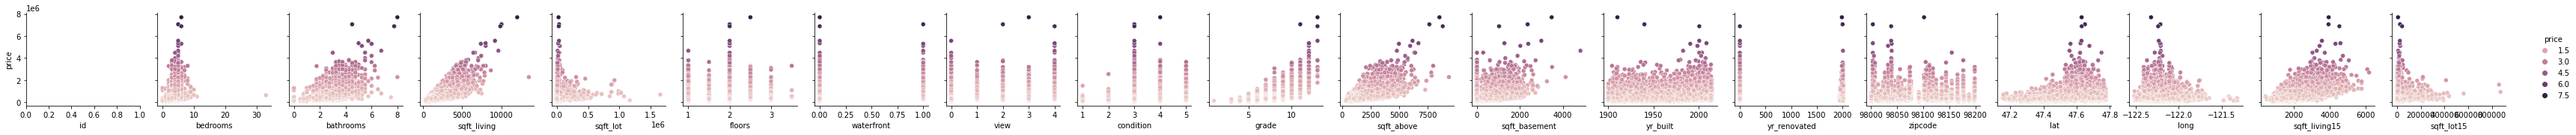

In [10]:
sns.pairplot(data=data, y_vars= 'price', kind='scatter', hue= 'price') 

In [11]:
#sns.heatmap(data.corr(), annot= True , linewidths=0.7)

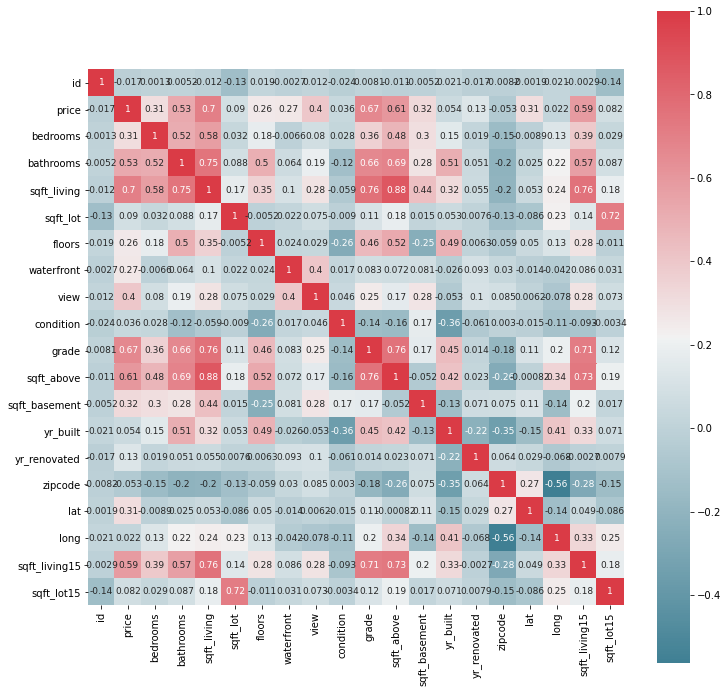

In [12]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : 1.2 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        )
plot_correlation_map( data )

In [13]:
#the important features:
#By observing the graphs we can see that there’s a big positive correlation between price and sqft_living,bathrooms, bedrooms, view, grade, sqft_above,sqft_living15

In [14]:
#linear regression(using one feature)
#extract x and y from our data
x=data[["sqft_living"]]
y=data["price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40) #splitting data with test size of 20%



In [15]:
x_train

,sqft_living
13355,2130
11095,1990
13406,1880
3257,2930
15850,1340
...,...
11532,2930
16065,2460
14501,1150
14555,2460


In [16]:
y_train

13355     530000.0
11095     450000.0
13406     538000.0
3257     1100000.0
15850     205000.0
           ...    
11532     610000.0
16065     280000.0
14501     171500.0
14555     930000.0
11590     255000.0
Name: price, Length: 15129, dtype: float64

In [17]:
#linear regression 
model=LinearRegression() #build linear regression model   
model.fit(x_train,y_train)  #fitting the training data

coeff_data=pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])

coeff_data


,Coefficients
sqft_living,281.904965


In [18]:
#this means if one unit increases, sqft_living will increase with ~282

In [19]:
predicted=model.predict(x_test) #testing our model’s performance
predicted

array([1032735.93293983,  728278.57063997,  491478.3999623 , ...,
        223668.68312446,  725459.52098904,  618335.63425391])

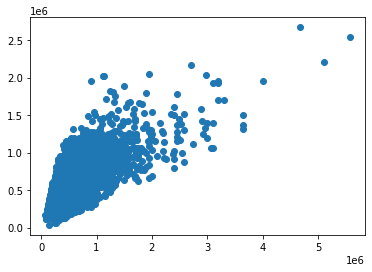

In [20]:
#visualize the prediction
plt.scatter(y_test, predicted)

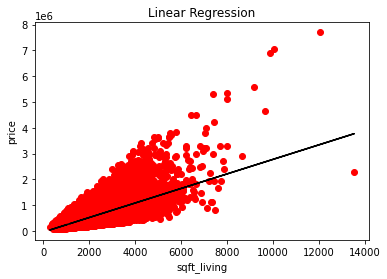

In [21]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [22]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 63595386112.83998
R squared 0.5053104226540768


C:\Users\xps\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

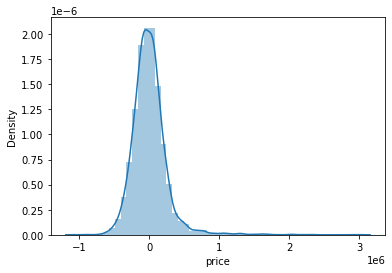

In [23]:
sns.distplot((y_test- predicted), bins=50)

In [24]:
#We can change each time the column to be evaluated, but we will always notice that the R squared score will not be 
#satisfactory in a perfect level.

In [25]:
#moving to multi-linear regression
X=data[['id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
Y=data['price']

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [27]:
model=LinearRegression()   #build linear regression model
model.fit(X_train,Y_train)  #fitting the training data

coeff_data=pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])

coeff_data

,Coefficients
id,-0.000001
bedrooms,-41628.013768
bathrooms,43220.478169
sqft_living,110.819415
sqft_lot,0.091428
floors,4695.964784
waterfront,606628.298623
view,53849.582478
condition,25958.528202
grade,94661.121031


In [28]:
predicted=model.predict(X_test) #testing our model’s performance
predicted

array([1037214.30955351,  724750.69005612,  342283.38506636, ...,
        242395.85167902,  718344.4234903 ,  985058.94939338])

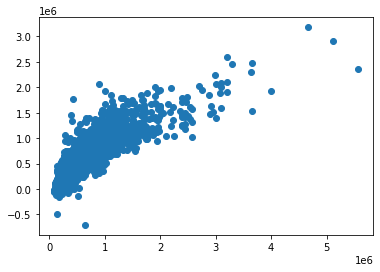

In [29]:
#visualize the prediction
plt.scatter(Y_test, predicted)

In [30]:
#there is a positive correlation
X.shape, X_test.shape, 

((21613, 19), (6484, 19))

In [31]:
Y.shape,Y_test.shape

((21613,), (6484,))

C:\Users\xps\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

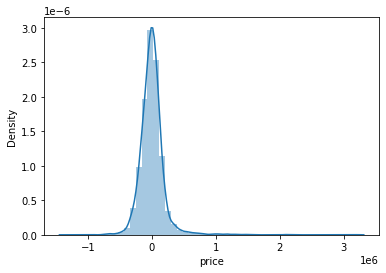

In [32]:
sns.distplot((Y_test- predicted), bins=50)

In [33]:
#Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

MSE 38013372177.04851
R squared 0.7043052937458196


In [34]:
#we can notice that by adding more features to predict housing prices, we got a satisfactory R squared result 
#approximating 70%
#Also, as far as I know regarding the plot, we cannot plot an n-D plot using seaborn. 

In [35]:
#Polynomial regression
x_=data[[ 'sqft_living']]
y_=data['price']


In [36]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.3, random_state=40)  #splitting data

In [37]:
model_=LinearRegression()
poly=PolynomialFeatures(degree=3)


In [38]:
x_train_fit = poly.fit_transform(x_train_) #transforming our input data

In [39]:
model.fit(x_train_fit, y_train_) # Fitting Polynomial Regression to the dataset 

LinearRegression()

In [40]:
x_test__ = poly.fit_transform(x_test_)

predicted = model.predict(x_test__)


In [41]:
print("MSE: ", metrics.mean_squared_error(y_test_, predicted))
print("R squared: ", metrics.r2_score(y_test_,predicted))

MSE:  58514513796.61124
R squared:  0.5448330159158594


In [43]:
#we can notice that polynomial regression gave better R score compared to linear regression as it uses different degrees of the studied feature.
#as we know, real problems are not solved linearly. 

In [44]:
#Multi-Polynomial regression
x_=data[['id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y_=data['price']


In [45]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.3, random_state=40)  #splitting data

In [46]:
model_=LinearRegression()
poly=PolynomialFeatures(degree=2)


In [47]:
x_train_fit = poly.fit_transform(x_train_) #transforming our input data

In [48]:
model.fit(x_train_fit, y_train_) # Fitting Polynomial Regression to the dataset 

LinearRegression()

In [49]:
x_test__ = poly.fit_transform(x_test_)

predicted = model.predict(x_test__)


In [50]:
print("MSE: ", metrics.mean_squared_error(y_test_, predicted))
print("R squared: ", metrics.r2_score(y_test_,predicted))

MSE:  35375770611.6745
R squared:  0.7248224111553541


In [54]:
#using polynomial of degree 2 gave more satisfactory results compared to the multi-linear regression, this is due to the use of features multiplications making our decision boundary  non_linear.
#because we know that the equation of a polynomial linear regression depends on multiplying diff features.